In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [121]:
pylab.rcParams['figure.figsize'] = (20, 11.0)
pylab.rcParams['font.family'] = "serif"
pylab.rcParams['font.size'] = 16

In [3]:
import pandas as pd
import xml.etree.ElementTree as ET
import io

In [191]:
def iter_Coll(author, param):
    doc_dict = {}
    for doc in author[param]:
        doc_dict = author.attrib.copy()
        if param == 0:
            doc_dict.update({'Ток': float(doc.attrib['Amper']), 'Напряжение': float(doc.attrib['Volt'])})
        else:
            a = doc.attrib['AmperAdd'].split(" ")[0]
            v = doc.attrib['VoltAdd'].split(" ")[0]
            doc_dict.update({'Ток': a, 'Напряжение': v})
        yield doc_dict

In [304]:
def cacl_last(df, phase, wire):
    x = []
    for k in df[phase+wire].tail(2)["Ток"].keys():
        x.append(k)

    x2 = df[phase+wire].tail(2)["Ток"][x[1]]
    y2 = df[phase+wire].tail(2)["Напряжение"][x[1]]

    x1 = df[phase+wire].tail(2)["Ток"][x[0]]
    y1 = df[phase+wire].tail(2)["Напряжение"][x[0]]

    return round((4 - x1)*(y2 - y1)/(x2 - x1) + y1, 2)

In [213]:
doc_df = {}

In [322]:
TT = "B404"
with open("ТТ "+ TT + "_5.8.2021.r21_transI", encoding="utf-8") as f:
    etree = ET.parse(f)

In [323]:
pd.DataFrame(list(iter_Coll(etree.getroot()[1], 1))).T.style.hide_index()

0,1,2,3,4,5,6,7,8
"0,1","0,2","0,3","0,5",1,2,3,4,5
"513,91","530,48","537,99","546,32","556,23","562,45","564,59",-,-


In [317]:
doc_df[TT] = pd.DataFrame(list(iter_Coll(etree.getroot()[1], 0)))

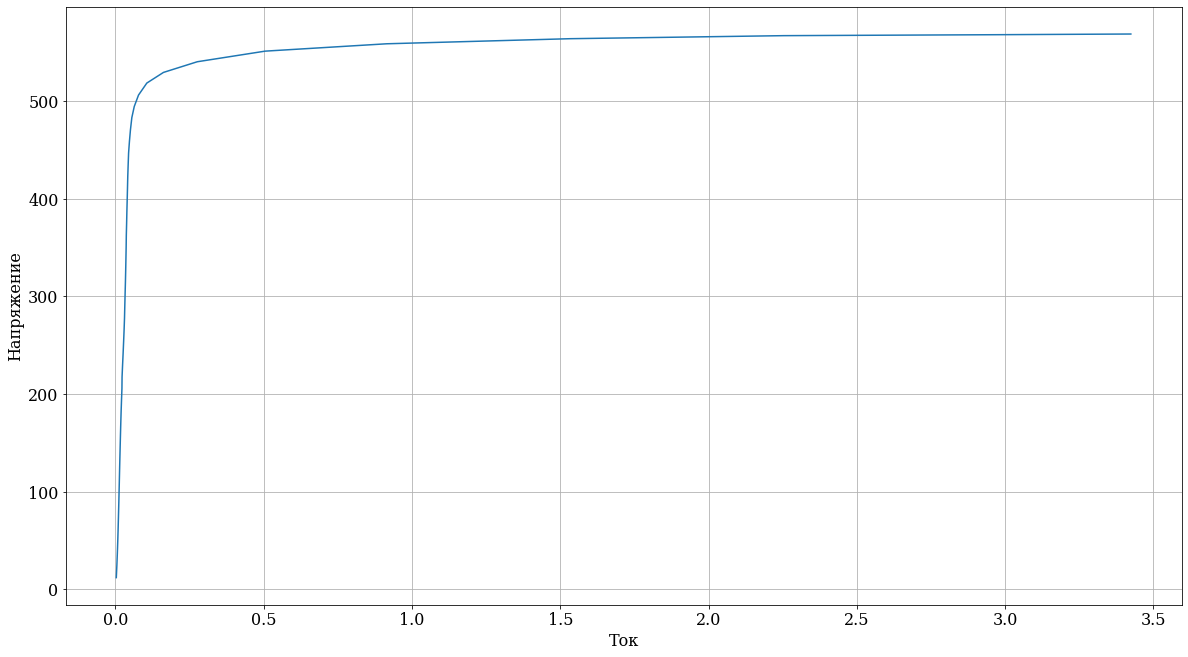

In [318]:
pie = doc_df[TT].plot(x="Ток", grid=True, ylabel="Напряжение", legend = False)
pie.get_figure().savefig(TT + ".png", bbox_inches='tight', pad_inches=0.1)

A 574.09
B 566.19
C 569.81


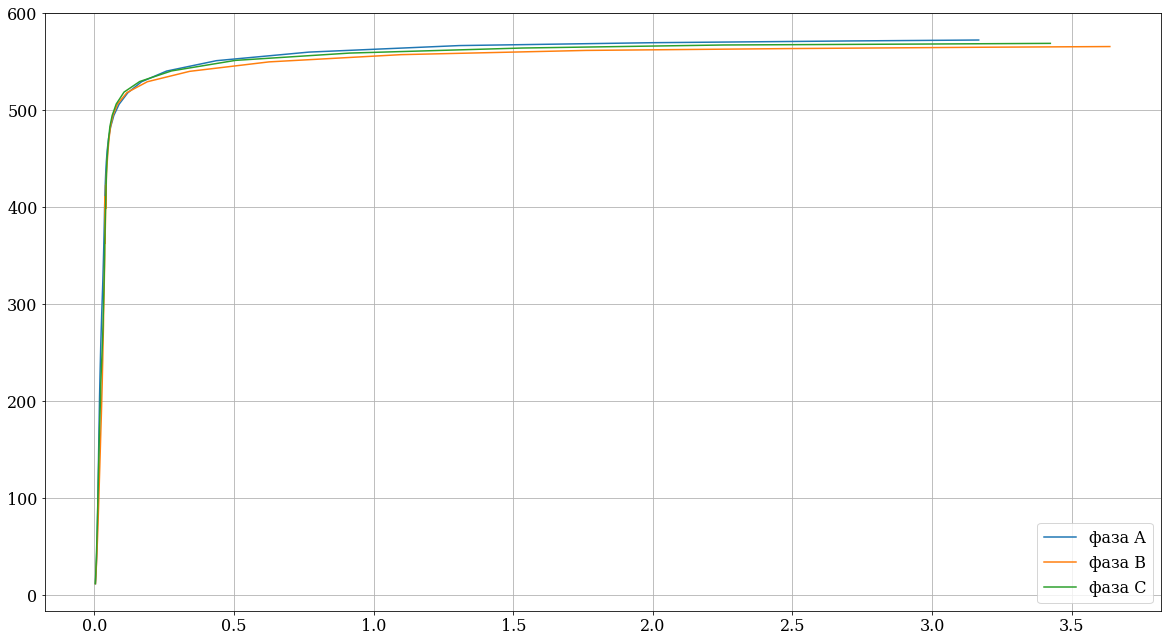

In [319]:
wire = "404"
for TT in ["A", "B", "C"]:
    plot(doc_df[TT+wire]["Ток"], doc_df[TT+wire]["Напряжение"], label="фаза " + TT)
    print(TT, cacl_last(doc_df, TT, wire))
legend()
grid()
savefig(wire + ".png", bbox_inches='tight', pad_inches=0.1)

545.0130671647426